In [45]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [46]:
# import warnings
# warnings.filterwarnings('ignore')

In [47]:
# Read from extracted data
flights = pd.read_csv("flights-2022-10-25-1326.csv")

In [48]:
# Take copy to measure data loss after clean-up
flights_df = flights.copy()

In [49]:

flights_df.set_index(flights_df.columns[0], inplace=True)
flights_df.index.name = None

In [50]:
flights_df.head()

,mkt_carrier,mkt_carrier_fl_num,fl_date,branded_code_share,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,...,mean_dep_delay_carrier_origin_date,mean_arr_delay_carrier_origin_date,mean_dep_delay_carrier_origin_date_t-1_week,mean_arr_delay_carrier_origin_date_t-1_week,mean_dep_delay_carrier_origin_date_t-1_week_week_number,mean_arr_delay_carrier_origin_date_t-1_week_week_number,mean_dep_delay_carrier_origin_datet-1_year_week,mean_arr_delay_carrier_origin_datet-1_year_week,mean_dep_delay_carrier_origin_date_t-1_year_month,mean_arr_delay_carrier_origin_date_t-1_year_month
0,AA,5159,2019-03-08,AA_CODESHARE,OH,5159,11057,"Charlotte, NC",11267,"Dayton, OH",...,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,NaN,NaN,NaN,NaN
1,AA,5160,2019-03-08,AA_CODESHARE,OH,5160,11057,"Charlotte, NC",10980,"Chattanooga, TN",...,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,NaN,NaN,NaN,NaN
2,AA,5161,2019-03-08,AA_CODESHARE,OH,5161,11057,"Charlotte, NC",13795,"Jacksonville/Camp Lejeune, NC",...,8.587573,3.787932,8.587573,3.787932,8.587573,3.787932,NaN,NaN,NaN,NaN
3,AA,5161,2019-03-08,AA_CODESHARE,OH,5161,13795,"Jacksonville/Camp Lejeune, NC",11057,"Charlotte, NC",...,5.924051,-2.025478,5.924051,-2.025478,5.924051,-2.025478,NaN,NaN,NaN,NaN
4,AA,5162,2019-03-08,AA_CODESHARE,OH,5162,12945,"Lexington, KY",13930,"Chicago, IL",...,2.854037,-2.925000,2.854037,-2.925000,2.854037,-2.925000,NaN,NaN,NaN,NaN


In [51]:
flights_df.shape

(600000, 70)

In [32]:
flights_df.columns

Index(['mkt_carrier', 'mkt_carrier_fl_num', 'fl_date', 'branded_code_share',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id',
       'origin_city_name', 'dest_airport_id', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'origin_city', 'origin_state', 'dest_city',
       'dest_state', 'day', 'month', 'year', 'crs_arr_hrs', 'crs_dep_hrs',
       'dep_hrs_catg', 'day_of_week', 'day_of_year', 'week_of_year',
       'fl_date_dt', 'fl_date_year', 'fl_date_year_month',
       'fl_date_Monday_of_week', 'fl_date_week_number',
       'fl_date_t-1_week_week_number', 'fl_date_t-1_week_date',
       'fl_date_

In [ ]:
data_columns = [
    
    'mean_dep_delay_carrier_origin_month',
    'mean_arr_delay_carrier_origin_month',
    'mean_dep_delay_carrier_origin_week',
    'mean_arr_delay_carrier_origin_week',
    'mean_dep_delay_carrier_origin_date',
    'mean_arr_delay_carrier_origin_date',
    'mean_dep_delay_carrier_origin_date_t-1_week',
    'mean_arr_delay_carrier_origin_date_t-1_week',
    'mean_dep_delay_carrier_origin_date_t-1_week_week_number',
    'mean_arr_delay_carrier_origin_date_t-1_week_week_number',
    'mean_dep_delay_carrier_origin_datet-1_year_week',
    'mean_arr_delay_carrier_origin_datet-1_year_week',
    'mean_dep_delay_carrier_origin_date_t-1_year_month',
    'mean_arr_delay_carrier_origin_date_t-1_year_month'


]

## EDA

In [ ]:
# col_names = [....]
# for col in col_names:
#     print(flights_df[col].value_counts())   

In [40]:
def explore(df,id=0,print_n_unique=True, printValues=False):
    """
    Explore dataframe data and print missing values.
    Parameters:
    - df: Dataframe.
    - id: Column number or name with the primary IDs. Default is zero.
    - print_n_unique (bool): If the number of unique values in the first column doesn't match 
        the number of rows in the df, print the number of unique values in each column to see if 
        there's another column that might serve as a unique id.
    """
    if (id==False) & (id !=0):
        pass
    elif isinstance(id,int):
    # if type(id)==int:
        print(f'Unique IDs: {len(set(df.iloc[:,0]))}. # of rows: {df.shape[0]}. Match: {len(set(df.iloc[:,0]))==df.shape[0]}')
    else:
        print(f'Unique IDs: {len(set(df[id]))}. # of rows: {df.shape[0]}. Match: {len(set(df[id]))==df.shape[0]}')
    
    # if the number of unique values in the first column doesn't match the number of rows in the df,
    # print the number of unique values in each column to see if there's another column that migh
    # serve as a unique id.
    if (print_n_unique==True):
        if len(set(df.iloc[:,0])) !=df.shape[0]: 
            for column in df.columns:
                print(len(df[column].value_counts()),'\t', column)
    
    # count amount of missing values in each column
    total = df.isnull().sum().sort_values(ascending=False) 
    # % of rows with missing data from each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 

    # create a table that lists total and % of missing values starting with the highest
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

    if (printValues == True):
        # extract the names of columns with missing values
        cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
        print(df.dtypes[cols_with_missing])

    print(f'')
    return missing_data

explore(flights_df,print_n_unique=False)

Unique IDs: 10. # of rows: 579038. Match: False
10 	 mkt_carrier
6560 	 mkt_carrier_fl_num
28 	 fl_date
15 	 branded_code_share
26 	 op_unique_carrier
6567 	 op_carrier_fl_num
372 	 origin_airport_id
365 	 origin_city_name
372 	 dest_airport_id
365 	 dest_city_name
1270 	 crs_dep_time
1419 	 dep_time
225 	 dep_delay
146 	 taxi_out
118 	 taxi_in
1343 	 crs_arr_time
1435 	 arr_time
220 	 arr_delay
1 	 cancelled
0 	 cancellation_code
1 	 diverted
470 	 crs_elapsed_time
639 	 actual_elapsed_time
619 	 air_time
1539 	 distance
142 	 carrier_delay
142 	 weather_delay
142 	 nas_delay
69 	 security_delay
142 	 late_aircraft_delay
962 	 first_dep_time
99 	 total_add_gtime
99 	 longest_add_gtime
356 	 origin_city
7 	 origin_state
356 	 dest_city
7 	 dest_state
28 	 day
2 	 month
1 	 year
25 	 crs_arr_hrs
24 	 crs_dep_hrs
4 	 dep_hrs_catg
7 	 day_of_week
28 	 day_of_year
5 	 week_of_year
28 	 fl_date_dt
1 	 fl_date_year
2 	 fl_date_year_month
5 	 fl_date_Monday_of_week
5 	 fl_date_week_number
5 	

,Total,Percent
mean_arr_delay_carrier_origin_date_t-1_year_month,579038,1.0
mean_arr_delay_carrier_origin_datet-1_year_week,579038,1.0
mean_dep_delay_carrier_origin_datet-1_year_week,579038,1.0
cancellation_code,579038,1.0
mean_dep_delay_carrier_origin_date_t-1_year_month,579038,1.0
...,...,...
origin_state,0,0.0
mkt_carrier_fl_num,0,0.0
dest_state,0,0.0
day,0,0.0


In [44]:
explore(flights_df,print_n_unique=False).head(35)

Unique IDs: 10. # of rows: 579038. Match: False



,Total,Percent
mean_arr_delay_carrier_origin_date_t-1_year_month,579038,1.000000
mean_arr_delay_carrier_origin_datet-1_year_week,579038,1.000000
mean_dep_delay_carrier_origin_datet-1_year_week,579038,1.000000
cancellation_code,579038,1.000000
mean_dep_delay_carrier_origin_date_t-1_year_month,579038,1.000000
longest_add_gtime,576665,0.995902
first_dep_time,576665,0.995902
total_add_gtime,576665,0.995902
weather_delay,495668,0.856020
nas_delay,495668,0.856020


In [ ]:
## Silvia 2022-10-25 20:48 Example of how to call the custom function for supervised learning
param_lr = {
    # 'penalty': ['l1','l2', 'elasticnet'],
    'C': C_list,
    'max_iter' : max_iter_list,
    'class_weight': [None, 'balanced']
}

lr = LogisticRegression(random_state=0)
lr_attributes = supervised(df, lr, param_lr, model_name='logistical regression')
best_lr = lr_attributes.get_best_model()

# Save the model
model = best_lr

filename = 'model_best_lr.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# DROP (['cancellation_code', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'carrier_delay'])	

In [ ]:
# Categorical variables convert to a numerical 
pd.get_dummies(flights_df)

In [ ]:
def correlation(df):
    """
    Plot the correlation matrix.
    Returns the dataframe with the correlation values.
    """

    # Create a mask to exclude the redundant cells that make up half of the graph.
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))

    # Create the heatmap with the mask and with annotation
    sns.heatmap(data=df.corr(numeric_only=True),mask=mask,annot=True)
    return df.corr()

## Preprocessing

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

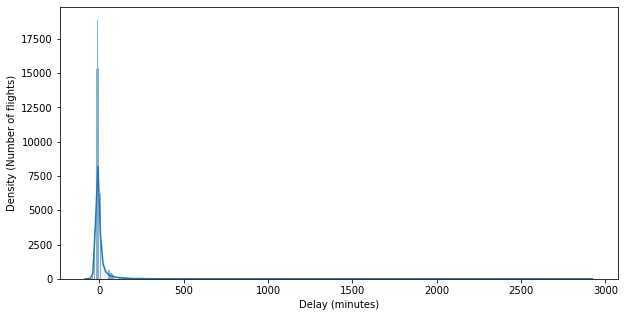

In [33]:
# Arrival Delays with outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')
sns.histplot(x = flights_df['arr_delay'], kde = True)

In [34]:
flights_df.arr_delay.describe()

count    587905.000000
mean          2.033858
std          46.461975
min         -84.000000
25%         -16.000000
50%          -8.000000
75%           4.000000
max        2923.000000
Name: arr_delay, dtype: float64

In [35]:
# Upper limit and lower limit using 3 standard deviations.
upper = flights_df.arr_delay.mean() + 3 * flights_df.arr_delay.std()
lower = flights_df.arr_delay.mean() - 3 * flights_df.arr_delay.std()
print(upper)
print(lower)

141.4197835339717
-137.35206851198686


In [36]:
# Filter out the outliers
flights_df = flights_df[(flights_df.arr_delay < upper) & (flights_df.arr_delay > lower)]

<AxesSubplot:xlabel='Delay (minutes)', ylabel='Density (Number of flights)'>

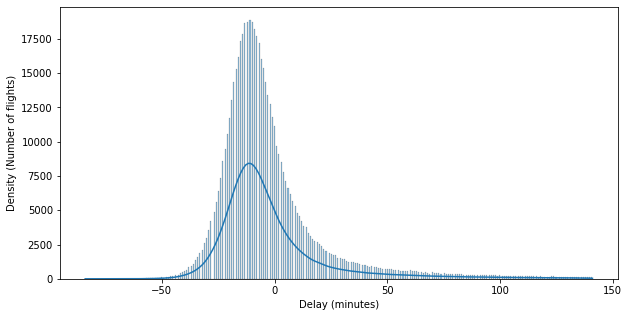

In [37]:
# Arrival Delays without outliers
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')

sns.histplot(x = flights_df['arr_delay'], kde = True)

In [ ]:
# Silvia @ 2022-10-25 18:48 Function to drop columns with missing values above a given threshold:
def drop_features(df,threshold=100, show_update=True):
    """
    Drop columns in a dataframe with null values above the specified threshold.
    Parameters:
    - df: Dataframe.
    - threshold (float): Float between 0 and 100. 
        Threshold of % null values over which columns will be dropped.
    - show_update: If true, show missing values for the updated dataframe
        (calls the custom function explore)
    """ 
    
    # count amount of missing values in each column
    total = df.isnull().sum().sort_values(ascending=False) 
    # % of rows with missing data from each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 

    # create a table that lists total and % of missing values starting with the highest
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 

    filter = missing_data['Percent'] > threshold
    to_drop = missing_data[filter].index.tolist()
    df.drop(to_drop, axis=1, inplace=True)
    print(f'Threshold of percentage values for dropping columns: {threshold}')
    print(f'Columns dropped: {to_drop}')
    if show_update == True:
        return explore(df,id=0,print_n_unique=False, printValues=False)

# # Apply the function by uncommenting

# threshold = 100 # Set the threshold
# drop_features(flights_df,threshold=threshold)

## Random Forest

In [ ]:
# Assign train and target variables
## Add columns to X
X = flights_df[['columns......']]   # features
y = flights_df['arr_delay']    # labels

X_train,X_test,y_train,y_test = model_selection.train_test_split(X, y, train_size = 0.75, test_size = 0.25,random_state = 42)

In [ ]:
display(flights_df.head(3))
display(flights_df.shape)

In [ ]:
# Create a Gaussian Classifier
model = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

# Save the model
filename = 'Random_Forest.sav'
pickle.dump(model,open(filename, 'wb'))

y_pred = model.predict(X_test)

In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
# Print the R2 score for the test dataset
print('R2 Score for train data:', round(model.score(X_train,y_train),3))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),3))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))

df = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

#### DRAFT

## Random Forest Grid Search

In [ ]:
#define hyperparameters we want to tune
param_grid = {
    'n_estimators' : [5,10,15,100,150],
    'criterion' : ['gini,', 'entropy'],
    'max_depth' : [5,8,10,12,15]
}

#instantiate GridSearchCV, fit model, and make prediction
model = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df = pd.DataFrame(model.cv_results_)

In [ ]:
display(model.best_params_)
display(model.best_score_)

df.sort_values('rank_test_score', ascending = True).head(3)

In [ ]:
def correlation(df):
    """
    Plot the correlation matrix.
    Returns the dataframe with the correlation values.
    """

    # Create a mask to exclude the redundant cells that make up half of the graph.
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))

    # Create the heatmap with the mask and with annotation
    sns.heatmap(data=df.corr(numeric_only=True),mask=mask,annot=True)
    return df.corr()

#### Save

In [ ]:
# Save the file to CSV
from datetime import datetime
datetime_now = datetime.now().strftime('%Y-%m-%d_%H%M')
filename = f'flights_{datetime_now}.csv'
print(filename)